# Let's Do it!

## Gather it!

In [1]:
#importing our lovely libraries 
import pandas as pd
import numpy as np
import matplotlib as plt
import json
import requests
import os
import tweepy as tp
%matplotlib inline

In [2]:
tweets = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
r = requests.get(url)
with open("image-predictions.tsv" , mode ='wb') as file:
    file.write(r.content)
images = pd.read_csv('image-predictions.tsv',sep = '\t')

In [4]:
df = tweets.set_index('tweet_id').join(images.set_index('tweet_id'), on = 'tweet_id')
len(df)
df.head()

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,,,,,,,,,,,
892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [5]:
con_key = 'Hide'
con_secret = 'Hide'
acc_token = 'Hide'
acc_sec = 'Hide'
auth = tp.OAuthHandler(con_key, con_secret)
auth.set_access_token(acc_token, acc_sec)

api = tp.API(auth)
#tw_ids=np.array(df.index)
#tw_ids
with open('tweet_json.txt', 'w') as output:
    for tweet_id in df.index:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, output)
            output.write('\n')
        except tp.TweepError:
            print('Error in' , tweet_id)


Error in 888202515573088257
Error in 873697596434513921
Error in 872668790621863937
Error in 872261713294495745
Error in 869988702071779329
Error in 866816280283807744
Error in 861769973181624320
Error in 856602993587888130
Error in 851953902622658560
Error in 845459076796616705
Error in 844704788403113984
Error in 842892208864923648
Error in 837366284874571778
Error in 837012587749474308
Error in 829374341691346946
Error in 827228250799742977
Error in 812747805718642688
Error in 802247111496568832
Error in 779123168116150273
Error in 775096608509886464
Error in 770743923962707968
Error in 758740312047005698
Error in 758474966123810816
Error in 758467244762497024
Error in 758405701903519748
Error in 758355060040593408
Error in 758099635764359168
Error in 758041019896193024
Error in 757741869644341248
Error in 757729163776290825
Error in 757725642876129280
Error in 757611664640446465
Error in 757597904299253760
Error in 757596066325864448
Error in 757400162377592832
Error in 75739310980

In [6]:
full_data = [['id','retweeted','retweet_count','favorited','favorite_count',]]
new_data = {}
with open('tweet_json.txt') as json_file:
    for line in json_file:
        new_data = json.loads(line)
        full_data.append([new_data['id'], new_data['retweeted'], new_data['retweet_count'], new_data['favorited'], new_data['favorite_count']  ])
#print("'\n full data:'", full_data)

    
ret_fav = pd.DataFrame(data=full_data[1:],    # values
                #index=full_data[1:],    # 1st column as index
                columns=full_data[0])  # 1st row as the column names
ret_fav

,id,retweeted,retweet_count,favorited,favorite_count
0,892420643555336193,False,7924,False,37099
1,892177421306343426,False,5886,False,31920
2,891815181378084864,False,3888,False,24032
3,891689557279858688,False,8082,False,40415
4,891327558926688256,False,8760,False,38640
5,891087950875897856,False,2912,False,19414
6,890971913173991426,False,1930,False,11332
7,890729181411237888,False,17675,False,62582
8,890609185150312448,False,4012,False,26718
9,890240255349198849,False,6894,False,30595


In [7]:
ret_fav.query('id == "892420643555336193"')

,id,retweeted,retweet_count,favorited,favorite_count
0,892420643555336193,False,7924,False,37099


In [8]:
df.query('tweet_id == "892420643555336193"')

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,,,,,,,,,,,
892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False


In [9]:
df_full = df.join(ret_fav.set_index('id'))
df_full.head()

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweeted,retweet_count,favorited,favorite_count
tweet_id,,,,,,,,,,,,,,,,,,,,,
892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,...,bagel,0.085851,False,banana,0.076110,False,False,7924.0,False,37099.0
892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,...,Pekinese,0.090647,True,papillon,0.068957,True,False,5886.0,False,31920.0
891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,...,malamute,0.078253,True,kelpie,0.031379,True,False,3888.0,False,24032.0
891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,False,8082.0,False,40415.0
891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,False,8760.0,False,38640.0


In [10]:
len(df) , len(tweets) , len(df_full)

(2356, 2356, 2356)

In [11]:
df_full.to_csv('df_full.csv')

## Assess it!

In [12]:
#See headers and tails
df_full.head()

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweeted,retweet_count,favorited,favorite_count
tweet_id,,,,,,,,,,,,,,,,,,,,,
892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,...,bagel,0.085851,False,banana,0.076110,False,False,7924.0,False,37099.0
892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,...,Pekinese,0.090647,True,papillon,0.068957,True,False,5886.0,False,31920.0
891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,...,malamute,0.078253,True,kelpie,0.031379,True,False,3888.0,False,24032.0
891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,False,8082.0,False,40415.0
891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,False,8760.0,False,38640.0


In [13]:
df_full.tail()

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweeted,retweet_count,favorited,favorite_count
tweet_id,,,,,,,,,,,,,,,,,,,,,
666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,...,Rottweiler,0.243682,True,Doberman,0.154629,True,NaN,NaN,NaN,NaN
666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,...,redbone,0.360687,True,miniature_pinscher,0.222752,True,NaN,NaN,NaN,NaN
666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,...,malinois,0.138584,True,bloodhound,0.116197,True,NaN,NaN,NaN,NaN
666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,...,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,NaN,NaN,NaN,NaN
666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,...,collie,0.156665,True,Shetland_sheepdog,0.061428,True,NaN,NaN,NaN,NaN


In [14]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 892420643555336193 to 666020888022790149
Data columns (total 31 columns):
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
jpg_url                       2075 non-null object


In [15]:
df_full.describe()

,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000,2075.000000,2075.000000,2.075000e+03,2.075000e+03,879.000000,879.000000
mean,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433,1.203855,0.594548,1.345886e-01,6.032417e-02,4894.918089,14163.084187
std,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237,0.561875,0.271174,1.006657e-01,5.090593e-02,5524.318679,14913.028875
min,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,1.000000,0.000000
25%,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000,1.000000,0.364412,5.388625e-02,1.622240e-02,2024.500000,5371.000000
50%,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000,1.000000,0.588230,1.181810e-01,4.944380e-02,3337.000000,10814.000000
75%,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000,1.000000,0.843855,1.955655e-01,9.180755e-02,5718.000000,19857.000000
max,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,58434.000000,136684.000000


In [16]:
#Do they all have their types?
len(df_full) == len(df_full.query('doggo != "None"')) + len(df_full.query('floofer != "None"'))  + len(df_full.query('pupper != "None"')) + len(df_full.query('puppo != "None"'))


False

In [17]:
#How mant of them had a type?
len(df_full.query('doggo != "None"')) + len(df_full.query('floofer != "None"'))  + len(df_full.query('pupper != "None"')) + len(df_full.query('puppo != "None"'))

394

In [18]:
#Sample them
df_full.sample(5)

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweeted,retweet_count,favorited,favorite_count
tweet_id,,,,,,,,,,,,,,,,,,,,,
849776966551130114,NaN,NaN,2017-04-06 00:13:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Seriously guys? Again? We only rate dogs. Plea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/849776966...,12,...,toy_terrier,0.136852,True,bonnet,0.103111,False,False,7657.0,False,30725.0
881633300179243008,8.816070e+17,47384430.0,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,...,NaN,NaN,NaN,NaN,NaN,NaN,False,7.0,False,121.0
703041949650034688,NaN,NaN,2016-02-26 02:20:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an East African Chalupa Seal. We only ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703041949...,10,...,doormat,0.152445,False,sea_lion,0.026364,False,NaN,NaN,NaN,NaN
729113531270991872,NaN,NaN,2016-05-08 00:59:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Challenge accepted""\n10/10 https://t.co/vNjvr...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/729113531...,10,...,prison,0.064831,False,bannister,0.048048,False,NaN,NaN,NaN,NaN
709566166965075968,NaN,NaN,2016-03-15 02:25:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Olaf. He's gotta be rare. Seems sturdy...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/709566166...,12,...,Tibetan_mastiff,0.000117,True,Australian_terrier,0.000011,True,NaN,NaN,NaN,NaN


In [19]:
df_full.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [20]:
df_full.describe()

,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000,2075.000000,2075.000000,2.075000e+03,2.075000e+03,879.000000,879.000000
mean,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433,1.203855,0.594548,1.345886e-01,6.032417e-02,4894.918089,14163.084187
std,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237,0.561875,0.271174,1.006657e-01,5.090593e-02,5524.318679,14913.028875
min,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,1.000000,0.000000
25%,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000,1.000000,0.364412,5.388625e-02,1.622240e-02,2024.500000,5371.000000
50%,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000,1.000000,0.588230,1.181810e-01,4.944380e-02,3337.000000,10814.000000
75%,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000,1.000000,0.843855,1.955655e-01,9.180755e-02,5718.000000,19857.000000
max,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,58434.000000,136684.000000


In [21]:
df_full.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [22]:
df_full.columns

Index(['in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source',
       'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'retweeted', 'retweet_count',
       'favorited', 'favorite_count'],
      dtype='object')

In [23]:
df_full.query('rating_numerator > 20').drop(columns=['in_reply_to_status_id','in_reply_to_user_id','timestamp','source',
                                                     'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp',
                                                         'name', 'doggo', 'floofer', 'pupper', 'puppo',
                                                       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
                                                       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'retweeted', 'retweet_count',
                                                       'favorited', 'favorite_count'])

,text,expanded_urls,rating_numerator,rating_denominator
tweet_id,,,,
855862651834028034,@dhmontgomery We also gave snoop dogg a 420/10...,NaN,420,10
855860136149123072,@s8n You tried very hard to portray this good ...,NaN,666,10
838150277551247360,@markhoppus 182/10,NaN,182,10
835246439529840640,@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,960,0
832215909146226688,"RT @dog_rates: This is Logan, the Chow who liv...",https://twitter.com/dog_rates/status/786709082...,75,10
820690176645140481,The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84,70
810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24,7
786709082849828864,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10
778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10


In [24]:
num_denom = df_full.query('rating_numerator > 20').drop(columns=['in_reply_to_status_id','in_reply_to_user_id','timestamp','source',
                                                     'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp',
                                                         'name', 'doggo', 'floofer', 'pupper', 'puppo',
                                                       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
                                                       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'retweeted', 'retweet_count',
                                                       'favorited', 'favorite_count'])
num_denom.to_csv('num_denom.csv')

## What to do:

**Quality:**

1. Some of them are retweets and this might be a duplication issue.
3. Sources are URLs while it seems to be the application used to tweet.
4. Missing URLs in expanded_urls, it's count is less than the index.
5. Some names are (None, a, an, the or other non-valid names).
6. Dog types are in Multicolumns.
8. TimeStamp is not an object and needed to get converted to time and date.
7. Numerators has some outliar like 1776 (Which have no issue but it still an outlier), 960, 666 and 420- The Outliars are correct but, the 9.75 was extracted as 75 and the 13 was extracted as 960
9. Numerator and Doniminator for Tweet Id 810984652412424192 is 24/7 (Everyday over the week) which means its extraction was wrong.


**Tidiness:**
1. Data in Multitable (Fixed in Assessing).
2. Dog types are in Multicolumns (doggo, floofer, pupper or puppo).


## Clean it!

#### Make a copy:

In [25]:
df_clean = df_full.copy()

In [26]:
df_clean.head()

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweeted,retweet_count,favorited,favorite_count
tweet_id,,,,,,,,,,,,,,,,,,,,,
892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,...,bagel,0.085851,False,banana,0.076110,False,False,7924.0,False,37099.0
892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,...,Pekinese,0.090647,True,papillon,0.068957,True,False,5886.0,False,31920.0
891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,...,malamute,0.078253,True,kelpie,0.031379,True,False,3888.0,False,24032.0
891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,False,8082.0,False,40415.0
891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,False,8760.0,False,38640.0


In [27]:
df_clean.retweeted.value_counts()

False    879
Name: retweeted, dtype: int64

In [28]:
df_clean.head()

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweeted,retweet_count,favorited,favorite_count
tweet_id,,,,,,,,,,,,,,,,,,,,,
892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,...,bagel,0.085851,False,banana,0.076110,False,False,7924.0,False,37099.0
892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,...,Pekinese,0.090647,True,papillon,0.068957,True,False,5886.0,False,31920.0
891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,...,malamute,0.078253,True,kelpie,0.031379,True,False,3888.0,False,24032.0
891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,False,8082.0,False,40415.0
891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,False,8760.0,False,38640.0


In [29]:
df_clean.in_reply_to_status_id.value_counts()

6.671522e+17    2
8.562860e+17    1
8.131273e+17    1
6.754971e+17    1
6.827884e+17    1
8.265984e+17    1
6.780211e+17    1
6.689207e+17    1
6.658147e+17    1
6.737159e+17    1
7.590995e+17    1
8.862664e+17    1
7.384119e+17    1
7.727430e+17    1
7.468859e+17    1
8.634256e+17    1
6.693544e+17    1
6.914169e+17    1
6.920419e+17    1
6.753494e+17    1
7.291135e+17    1
8.406983e+17    1
6.747400e+17    1
7.501805e+17    1
6.744689e+17    1
7.638652e+17    1
6.747934e+17    1
8.503288e+17    1
6.747522e+17    1
8.816070e+17    1
               ..
8.380855e+17    1
8.211526e+17    1
8.558616e+17    1
8.558585e+17    1
7.032559e+17    1
6.678065e+17    1
8.018543e+17    1
7.667118e+17    1
6.855479e+17    1
6.717299e+17    1
6.715610e+17    1
6.758457e+17    1
6.924173e+17    1
7.476487e+17    1
8.381455e+17    1
6.903413e+17    1
8.476062e+17    1
8.352460e+17    1
6.813394e+17    1
8.795538e+17    1
6.860340e+17    1
8.571567e+17    1
6.765883e+17    1
7.044857e+17    1
8.707262e+

# Quality Issues:

### 1. Remove retweets and favourites:

#### Define:
We will remove data that are retweets and favourites:

#### Code:

In [30]:
df_clean = df_clean.query('in_reply_to_status_id == "NaN"')

#### Test:

In [31]:
df_clean.in_reply_to_status_id.value_counts()

Series([], Name: in_reply_to_status_id, dtype: int64)

#### Code:

In [32]:
df_clean = df_clean.query('retweeted_status_id == "NaN"')

#### Test:

In [33]:
df_clean.retweeted_status_id.value_counts()

Series([], Name: retweeted_status_id, dtype: int64)

#### Define:
Remove columns as we don't need them anymore:

#### Code:

In [34]:
df_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], inplace= True)

#### Test:

In [35]:
df_clean.head()

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweeted,retweet_count,favorited,favorite_count
tweet_id,,,,,,,,,,,,,,,,,,,,,
892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,...,bagel,0.085851,False,banana,0.076110,False,False,7924.0,False,37099.0
892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,...,Pekinese,0.090647,True,papillon,0.068957,True,False,5886.0,False,31920.0
891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,...,malamute,0.078253,True,kelpie,0.031379,True,False,3888.0,False,24032.0
891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,False,8082.0,False,40415.0
891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,False,8760.0,False,38640.0


In [36]:
len(df_clean)

2097

### 2. Make data in Source column clean:

#### Define:
Remove unuseful data in Source column to be clear:

#### Code:

In [37]:
df_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1964
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [38]:
clean_source = []
for source in df_clean.source:
    first_letter = source.find(">") + 1
    last_letter = source.find("<",2)
    new_source = source[first_letter:last_letter]
    clean_source.append(new_source)
    
np.array(clean_source)
df_clean['clean_source'] = clean_source
df_clean.head()

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweeted,retweet_count,favorited,favorite_count,clean_source
tweet_id,,,,,,,,,,,,,,,,,,,,,
892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,...,0.085851,False,banana,0.076110,False,False,7924.0,False,37099.0,Twitter for iPhone
892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,...,0.090647,True,papillon,0.068957,True,False,5886.0,False,31920.0,Twitter for iPhone
891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,...,0.078253,True,kelpie,0.031379,True,False,3888.0,False,24032.0,Twitter for iPhone
891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,...,0.168086,True,spatula,0.040836,False,False,8082.0,False,40415.0,Twitter for iPhone
891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,...,0.225770,True,German_short-haired_pointer,0.175219,True,False,8760.0,False,38640.0,Twitter for iPhone


#### Test and Remove the old one:

In [39]:
df_clean.clean_source.value_counts() , df_clean.source.value_counts() 


(Twitter for iPhone     1964
 Vine - Make a Scene      91
 Twitter Web Client       31
 TweetDeck                11
 Name: clean_source, dtype: int64,
 <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1964
 <a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
 <a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
 <a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
 Name: source, dtype: int64)

In [40]:
df_clean.drop(['source'], axis=1,inplace=True)
df_clean.head()

,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweeted,retweet_count,favorited,favorite_count,clean_source
tweet_id,,,,,,,,,,,,,,,,,,,,,
892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,...,0.085851,False,banana,0.076110,False,False,7924.0,False,37099.0,Twitter for iPhone
892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,...,0.090647,True,papillon,0.068957,True,False,5886.0,False,31920.0,Twitter for iPhone
891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,...,0.078253,True,kelpie,0.031379,True,False,3888.0,False,24032.0,Twitter for iPhone
891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,...,0.168086,True,spatula,0.040836,False,False,8082.0,False,40415.0,Twitter for iPhone
891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,...,0.225770,True,German_short-haired_pointer,0.175219,True,False,8760.0,False,38640.0,Twitter for iPhone


### 3. Drop missing expanded_urls:

#### Define:
As we cannot find them, this might be unuseful for us:

#### Code:

In [41]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 892420643555336193 to 666020888022790149
Data columns (total 26 columns):
timestamp             2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    1971 non-null object
p3_conf               1971 non-null float64


In [42]:
df_clean.expanded_urls.value_counts()

https://vine.co/v/ea0OwvPTx9l                                                                                                                                                                                                                                      2
https://twitter.com/dog_rates/status/677334615166730240/photo/1,https://twitter.com/dog_rates/status/677334615166730240/photo/1                                                                                                                                    1
https://twitter.com/dog_rates/status/702539513671897089/photo/1,https://twitter.com/dog_rates/status/702539513671897089/photo/1,https://twitter.com/dog_rates/status/702539513671897089/photo/1                                                                    1
https://twitter.com/dog_rates/status/708810915978854401/photo/1,https://twitter.com/dog_rates/status/708810915978854401/photo/1,https://twitter.com/dog_rates/status/708810915978854401/photo/1                          

In [43]:
df_clean[df_clean['expanded_urls'].isnull()]

,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweeted,retweet_count,favorited,favorite_count,clean_source
tweet_id,,,,,,,,,,,,,,,,,,,,,
828361771580813312,2017-02-05 21:56:51 +0000,Beebop and Doobert should start a band 12/10 w...,NaN,12,10,None,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,False,177.0,False,2275.0,Twitter Web Client
785515384317313025,2016-10-10 16:20:36 +0000,"Today, 10/10, should be National Dog Rates Day",NaN,10,10,None,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,False,1328.0,False,6368.0,Twitter for iPhone
696518437233913856,2016-02-08 02:18:30 +0000,Oh my god 10/10 for every little hot dog pupper,NaN,10,10,None,None,None,pupper,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Twitter for iPhone


In [44]:
#let's see if they are really duplicated tweets:
len(df_clean.duplicated(keep='first'))

2097

#### Drop

In [45]:
df_clean.drop(df_clean[df_clean['expanded_urls'].isnull()].index,inplace=True)

#### Test:

In [46]:
len(df_clean)

2094

### 4. Remove (None , a, an and the) in names:

#### Define:
None, a, an and the are not valid names, I'll remove them one by one and check:

#### Code:

In [47]:
df_clean.name.value_counts()

None         600
a             55
Lucy          11
Charlie       11
Cooper        10
Oliver        10
Penny          9
Tucker         9
Sadie          8
Lola           8
the            8
Winston        8
Toby           7
Daisy          7
Stanley        6
Bella          6
Bo             6
Jax            6
Bailey         6
Oscar          6
an             6
Koda           6
Buddy          5
Rusty          5
Leo            5
Milo           5
Bentley        5
Louis          5
Chester        5
Dave           5
            ... 
Rumble         1
Bobb           1
Bookstore      1
Kanu           1
Sojourner      1
Sweet          1
Strider        1
Strudel        1
Gustav         1
Noah           1
Lorelei        1
Samsom         1
Arnold         1
Kyro           1
Yoda           1
Gustaf         1
Dante          1
Banjo          1
Rizzy          1
Tuck           1
Jazzy          1
Damon          1
Moofasa        1
Florence       1
Cali           1
Darby          1
Rilo           1
Henry         

##### Remove ('None):

In [48]:
none_names = df_clean.query('name == "None"').index
np.array(none_names)
for the_index in none_names:
    df_clean.drop(the_index,inplace= True)

#### Test

In [49]:
len(df_clean)

1494

In [50]:
df_clean.name.value_counts()

a            55
Lucy         11
Charlie      11
Cooper       10
Oliver       10
Tucker        9
Penny         9
the           8
Lola          8
Winston       8
Sadie         8
Toby          7
Daisy         7
Jax           6
Bailey        6
Bella         6
Stanley       6
an            6
Bo            6
Oscar         6
Koda          6
Milo          5
Scout         5
Rusty         5
Louis         5
Bentley       5
Buddy         5
Leo           5
Chester       5
Dave          5
             ..
Rumble        1
Bobb          1
Bookstore     1
Kanu          1
Sojourner     1
Sweet         1
Strider       1
Strudel       1
Gustav        1
Noah          1
Lorelei       1
Samsom        1
Arnold        1
Kyro          1
Yoda          1
Gustaf        1
Dante         1
Banjo         1
Rizzy         1
Tuck          1
Jazzy         1
Damon         1
Moofasa       1
Florence      1
Cali          1
Darby         1
Rilo          1
Henry         1
Tuco          1
Kane          1
Name: name, Length: 954,

##### Remove ('a'):

In [51]:
a_names = df_clean.query('name == "a"').index
np.array(a_names)
for the_index in a_names:
    df_clean.drop(the_index,inplace= True)

#### Test

In [52]:
len(df_clean)

1439

##### Remove ('an'):

In [53]:
an_names = df_clean.query('name == "an"').index
np.array(an_names)
for the_index in an_names:
    df_clean.drop(the_index,inplace= True)

#### Test

In [54]:
len(df_clean)

1433

##### Remove ('the'):

In [55]:
the_names = df_clean.query('name == "the"').index
np.array(the_names)
for the_index in the_names:
    df_clean.drop(the_index,inplace= True)

#### Test

In [56]:
len(df_clean)

1425

### 5. Make the time Stamp date and time:

#### Define:
The TimeStamp is not date and time as it should be, Change the data type:

#### Code:

In [58]:
df_clean['new_timestamp']= pd.to_datetime(df_clean['timestamp'])

In [59]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1425 entries, 892420643555336193 to 666411507551481857
Data columns (total 27 columns):
timestamp             1425 non-null object
text                  1425 non-null object
expanded_urls         1425 non-null object
rating_numerator      1425 non-null int64
rating_denominator    1425 non-null int64
name                  1425 non-null object
doggo                 1425 non-null object
floofer               1425 non-null object
pupper                1425 non-null object
puppo                 1425 non-null object
jpg_url               1379 non-null object
img_num               1379 non-null float64
p1                    1379 non-null object
p1_conf               1379 non-null float64
p1_dog                1379 non-null object
p2                    1379 non-null object
p2_conf               1379 non-null float64
p2_dog                1379 non-null object
p3                    1379 non-null object
p3_conf               1379 non-null float64


In [60]:
df_clean.head()

,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,...,p2_dog,p3,p3_conf,p3_dog,retweeted,retweet_count,favorited,favorite_count,clean_source,new_timestamp
tweet_id,,,,,,,,,,,,,,,,,,,,,
892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,...,False,banana,0.076110,False,False,7924.0,False,37099.0,Twitter for iPhone,2017-08-01 16:23:56
892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,...,True,papillon,0.068957,True,False,5886.0,False,31920.0,Twitter for iPhone,2017-08-01 00:17:27
891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,...,True,kelpie,0.031379,True,False,3888.0,False,24032.0,Twitter for iPhone,2017-07-31 00:18:03
891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,...,True,spatula,0.040836,False,False,8082.0,False,40415.0,Twitter for iPhone,2017-07-30 15:58:51
891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,...,True,German_short-haired_pointer,0.175219,True,False,8760.0,False,38640.0,Twitter for iPhone,2017-07-29 16:00:24


In [61]:
df_clean.drop('timestamp',axis=1,inplace=True)

In [62]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1425 entries, 892420643555336193 to 666411507551481857
Data columns (total 26 columns):
text                  1425 non-null object
expanded_urls         1425 non-null object
rating_numerator      1425 non-null int64
rating_denominator    1425 non-null int64
name                  1425 non-null object
doggo                 1425 non-null object
floofer               1425 non-null object
pupper                1425 non-null object
puppo                 1425 non-null object
jpg_url               1379 non-null object
img_num               1379 non-null float64
p1                    1379 non-null object
p1_conf               1379 non-null float64
p1_dog                1379 non-null object
p2                    1379 non-null object
p2_conf               1379 non-null float64
p2_dog                1379 non-null object
p3                    1379 non-null object
p3_conf               1379 non-null float64
p3_dog                1379 non-null object


### 6. Wrong rating extraction:
### Define:
The Numerators and denomirators have mistakes in extraction process, I'll clean them one-by-one:

#### Rating 9.75 instead of 75: 

#### Code:

In [63]:
df_clean.rating_numerator=df_clean.rating_numerator.replace(75,9.75)

#### Test:

In [64]:
df_clean.query('rating_numerator == 75')

,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,...,p2_dog,p3,p3_conf,p3_dog,retweeted,retweet_count,favorited,favorite_count,clean_source,new_timestamp
tweet_id,,,,,,,,,,,,,,,,,,,,,


#### Code:

In [65]:
df_clean.query('rating_numerator == 960')

,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,...,p2_dog,p3,p3_conf,p3_dog,retweeted,retweet_count,favorited,favorite_count,clean_source,new_timestamp
tweet_id,,,,,,,,,,,,,,,,,,,,,


#### This one is different, Actually they meant  he is smiling all the time not that he is rated 24/7 : 

In [66]:
df_clean.query('rating_numerator == 24')

,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,...,p2_dog,p3,p3_conf,p3_dog,retweeted,retweet_count,favorited,favorite_count,clean_source,new_timestamp
tweet_id,,,,,,,,,,,,,,,,,,,,,
810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24.0,7,Sam,None,None,None,None,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,...,True,Labrador_retriever,0.025823,True,False,1517.0,False,5574.0,Twitter for iPhone,2016-12-19 23:06:23


#### Code:

In [67]:
df_clean.drop(index=810984652412424192,inplace = True)

#### Test:

In [68]:
df_clean.query('rating_numerator == 24')

,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,...,p2_dog,p3,p3_conf,p3_dog,retweeted,retweet_count,favorited,favorite_count,clean_source,new_timestamp
tweet_id,,,,,,,,,,,,,,,,,,,,,


In [69]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1424 entries, 892420643555336193 to 666411507551481857
Data columns (total 26 columns):
text                  1424 non-null object
expanded_urls         1424 non-null object
rating_numerator      1424 non-null float64
rating_denominator    1424 non-null int64
name                  1424 non-null object
doggo                 1424 non-null object
floofer               1424 non-null object
pupper                1424 non-null object
puppo                 1424 non-null object
jpg_url               1378 non-null object
img_num               1378 non-null float64
p1                    1378 non-null object
p1_conf               1378 non-null float64
p1_dog                1378 non-null object
p2                    1378 non-null object
p2_conf               1378 non-null float64
p2_dog                1378 non-null object
p3                    1378 non-null object
p3_conf               1378 non-null float64
p3_dog                1378 non-null objec

In [70]:
df_clean.to_csv('clean_data.csv')

## Tideness issues:
### 1. Dog type have to be in one column:

#### Define:
Dog type is one info, and it must be in one data column: 

#### Code:

In [71]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1424 entries, 892420643555336193 to 666411507551481857
Data columns (total 26 columns):
text                  1424 non-null object
expanded_urls         1424 non-null object
rating_numerator      1424 non-null float64
rating_denominator    1424 non-null int64
name                  1424 non-null object
doggo                 1424 non-null object
floofer               1424 non-null object
pupper                1424 non-null object
puppo                 1424 non-null object
jpg_url               1378 non-null object
img_num               1378 non-null float64
p1                    1378 non-null object
p1_conf               1378 non-null float64
p1_dog                1378 non-null object
p2                    1378 non-null object
p2_conf               1378 non-null float64
p2_dog                1378 non-null object
p3                    1378 non-null object
p3_conf               1378 non-null float64
p3_dog                1378 non-null objec

##### Make a copy to Melt them, then get it back:

In [72]:
df_clean.columns

Index(['text', 'expanded_urls', 'rating_numerator', 'rating_denominator',
       'name', 'doggo', 'floofer', 'pupper', 'puppo', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'retweeted', 'retweet_count', 'favorited', 'favorite_count',
       'clean_source', 'new_timestamp'],
      dtype='object')

In [73]:
df_clean.doggo.value_counts()

None     1379
doggo      45
Name: doggo, dtype: int64

In [74]:
new_dog_type = df_clean[['doggo', 'floofer', 'pupper', 'puppo']].copy()
new_dog_type

,doggo,floofer,pupper,puppo
tweet_id,,,,
892420643555336193,None,None,None,None
892177421306343426,None,None,None,None
891815181378084864,None,None,None,None
891689557279858688,None,None,None,None
891327558926688256,None,None,None,None
890971913173991426,None,None,None,None
890609185150312448,None,None,None,None
890240255349198849,doggo,None,None,None
890006608113172480,None,None,None,None


In [75]:
new_dog_type.replace(['None'],[None],inplace=True)
new_dog_type.head()

,doggo,floofer,pupper,puppo
tweet_id,,,,
892420643555336193,None,None,None,None
892177421306343426,None,None,None,None
891815181378084864,None,None,None,None
891689557279858688,None,None,None,None
891327558926688256,None,None,None,None


In [76]:
new_dog_type['tweet_id'] = new_dog_type.index
new_dog_type

,doggo,floofer,pupper,puppo,tweet_id
tweet_id,,,,,
892420643555336193,None,None,None,None,892420643555336193
892177421306343426,None,None,None,None,892177421306343426
891815181378084864,None,None,None,None,891815181378084864
891689557279858688,None,None,None,None,891689557279858688
891327558926688256,None,None,None,None,891327558926688256
890971913173991426,None,None,None,None,890971913173991426
890609185150312448,None,None,None,None,890609185150312448
890240255349198849,doggo,None,None,None,890240255349198849
890006608113172480,None,None,None,None,890006608113172480


In [77]:
new_dog_type = pd.melt(new_dog_type,id_vars='tweet_id',value_name ='dog_type')
new_dog_type

,tweet_id,variable,dog_type
0,892420643555336193,doggo,None
1,892177421306343426,doggo,None
2,891815181378084864,doggo,None
3,891689557279858688,doggo,None
4,891327558926688256,doggo,None
5,890971913173991426,doggo,None
6,890609185150312448,doggo,None
7,890240255349198849,doggo,doggo
8,890006608113172480,doggo,None
9,889880896479866881,doggo,None


In [78]:
df_clean['tweet_id']=df_clean.index
df_clean.head()

,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,...,p3,p3_conf,p3_dog,retweeted,retweet_count,favorited,favorite_count,clean_source,new_timestamp,tweet_id
tweet_id,,,,,,,,,,,,,,,,,,,,,
892420643555336193,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,None,None,None,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,banana,0.076110,False,False,7924.0,False,37099.0,Twitter for iPhone,2017-08-01 16:23:56,892420643555336193
892177421306343426,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,None,None,None,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,papillon,0.068957,True,False,5886.0,False,31920.0,Twitter for iPhone,2017-08-01 00:17:27,892177421306343426
891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,None,None,None,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,kelpie,0.031379,True,False,3888.0,False,24032.0,Twitter for iPhone,2017-07-31 00:18:03,891815181378084864
891689557279858688,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,None,None,None,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,spatula,0.040836,False,False,8082.0,False,40415.0,Twitter for iPhone,2017-07-30 15:58:51,891689557279858688
891327558926688256,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,None,None,None,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,German_short-haired_pointer,0.175219,True,False,8760.0,False,38640.0,Twitter for iPhone,2017-07-29 16:00:24,891327558926688256


In [79]:
new_dog_type.dropna(inplace=True)

In [80]:
df_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'],inplace=True)
df_clean.head()

,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,p1_conf,p1_dog,...,p3,p3_conf,p3_dog,retweeted,retweet_count,favorited,favorite_count,clean_source,new_timestamp,tweet_id
tweet_id,,,,,,,,,,,,,,,,,,,,,
892420643555336193,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,...,banana,0.076110,False,False,7924.0,False,37099.0,Twitter for iPhone,2017-08-01 16:23:56,892420643555336193
892177421306343426,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,...,papillon,0.068957,True,False,5886.0,False,31920.0,Twitter for iPhone,2017-08-01 00:17:27,892177421306343426
891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,...,kelpie,0.031379,True,False,3888.0,False,24032.0,Twitter for iPhone,2017-07-31 00:18:03,891815181378084864
891689557279858688,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,...,spatula,0.040836,False,False,8082.0,False,40415.0,Twitter for iPhone,2017-07-30 15:58:51,891689557279858688
891327558926688256,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,...,German_short-haired_pointer,0.175219,True,False,8760.0,False,38640.0,Twitter for iPhone,2017-07-29 16:00:24,891327558926688256


In [81]:
len(df_clean),len(new_dog_type)

(1424, 197)

In [82]:
new_dog_type.variable.value_counts()

pupper     131
doggo       45
puppo       16
floofer      5
Name: variable, dtype: int64

In [83]:
new_dog_type.dog_type.value_counts()

pupper     131
doggo       45
puppo       16
floofer      5
Name: dog_type, dtype: int64

In [84]:
new_dog_type.drop(columns=['variable'],inplace=True)
new_dog_type

,tweet_id,dog_type
7,890240255349198849,doggo
30,884162670584377345,doggo
72,871515927908634625,doggo
80,869596645499047938,doggo
145,846514051647705089,doggo
148,845397057150107648,doggo
179,836753516572119041,doggo
197,832998151111966721,doggo
203,832273440279240704,doggo
204,832032802820481025,doggo


In [85]:
df_clean_again = df_clean.set_index('tweet_id').join(new_dog_type.set_index('tweet_id'),on ='tweet_id',how='outer' )
df_clean_again

,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,p1_conf,p1_dog,...,p3,p3_conf,p3_dog,retweeted,retweet_count,favorited,favorite_count,clean_source,new_timestamp,dog_type
tweet_id,,,,,,,,,,,,,,,,,,,,,
892420643555336193,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,...,banana,0.076110,False,False,7924.0,False,37099.0,Twitter for iPhone,2017-08-01 16:23:56,NaN
892177421306343426,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,...,papillon,0.068957,True,False,5886.0,False,31920.0,Twitter for iPhone,2017-08-01 00:17:27,NaN
891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,...,kelpie,0.031379,True,False,3888.0,False,24032.0,Twitter for iPhone,2017-07-31 00:18:03,NaN
891689557279858688,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,...,spatula,0.040836,False,False,8082.0,False,40415.0,Twitter for iPhone,2017-07-30 15:58:51,NaN
891327558926688256,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,...,German_short-haired_pointer,0.175219,True,False,8760.0,False,38640.0,Twitter for iPhone,2017-07-29 16:00:24,NaN
890971913173991426,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10,Jax,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1.0,Appenzeller,0.341703,True,...,ice_lolly,0.193548,False,False,1930.0,False,11332.0,Twitter for iPhone,2017-07-28 16:27:12,NaN
890609185150312448,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,10,Zoey,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1.0,Irish_terrier,0.487574,True,...,Chesapeake_Bay_retriever,0.118184,True,False,4012.0,False,26718.0,Twitter for iPhone,2017-07-27 16:25:51,NaN
890240255349198849,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10,Cassie,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1.0,Pembroke,0.511319,True,...,Chihuahua,0.029248,True,False,6894.0,False,30595.0,Twitter for iPhone,2017-07-26 15:59:51,doggo
890006608113172480,This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,13.0,10,Koda,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,1.0,Samoyed,0.957979,True,...,chow,0.008167,True,False,6864.0,False,29449.0,Twitter for iPhone,2017-07-26 00:31:25,NaN


In [86]:
df_clean_again.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1429 entries, 892420643555336193 to 666411507551481857
Data columns (total 23 columns):
text                  1429 non-null object
expanded_urls         1429 non-null object
rating_numerator      1429 non-null float64
rating_denominator    1429 non-null int64
name                  1429 non-null object
jpg_url               1383 non-null object
img_num               1383 non-null float64
p1                    1383 non-null object
p1_conf               1383 non-null float64
p1_dog                1383 non-null object
p2                    1383 non-null object
p2_conf               1383 non-null float64
p2_dog                1383 non-null object
p3                    1383 non-null object
p3_conf               1383 non-null float64
p3_dog                1383 non-null object
retweeted             547 non-null object
retweet_count         547 non-null float64
favorited             547 non-null object
favorite_count        547 non-null float64


In [87]:
df_clean = df_clean_again.copy()

## Let's do some Analysis:

#### How many of them have rating more than ten and what's the ratio of them:

In [88]:
above_ten = len(df_clean.query('rating_numerator > 10'))
above_ten

884

In [89]:
above_ten_ratio = len(df_clean.query('rating_numerator > 10')) / len(df_clean) * 100
above_ten_ratio

61.86144156752974

In [90]:
numerators = df_clean.rating_numerator.value_counts()
numerators_array = np.array([numerators.index,numerators])
numerators_df = pd.DataFrame({'Rating': numerators_array[0], 'Repeats': numerators_array[1]})
numerators_df


,Rating,Repeats
0,12.00,353.0
1,11.00,319.0
2,10.00,285.0
3,13.00,188.0
4,9.00,103.0
5,8.00,72.0
6,7.00,33.0
7,14.00,20.0
8,6.00,18.0
9,5.00,14.0


In [91]:
numerators_df.drop([13,15],inplace=True)
numerators_df

,Rating,Repeats
0,12.00,353.0
1,11.00,319.0
2,10.00,285.0
3,13.00,188.0
4,9.00,103.0
5,8.00,72.0
6,7.00,33.0
7,14.00,20.0
8,6.00,18.0
9,5.00,14.0


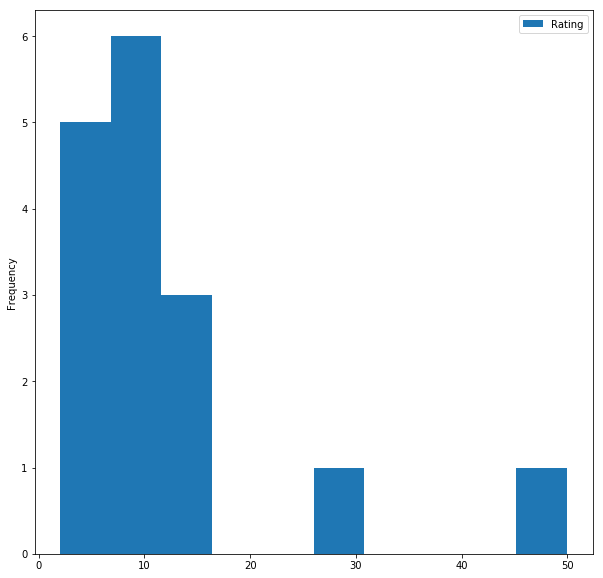

In [92]:
numerators_df.plot(x='Repeats', y='Rating',figsize=(10,10),kind='hist')


### How many tweets came from iPhone Application:

In [93]:
df_clean.clean_source.value_counts()

Twitter for iPhone     1358
Vine - Make a Scene      44
Twitter Web Client       17
TweetDeck                10
Name: clean_source, dtype: int64

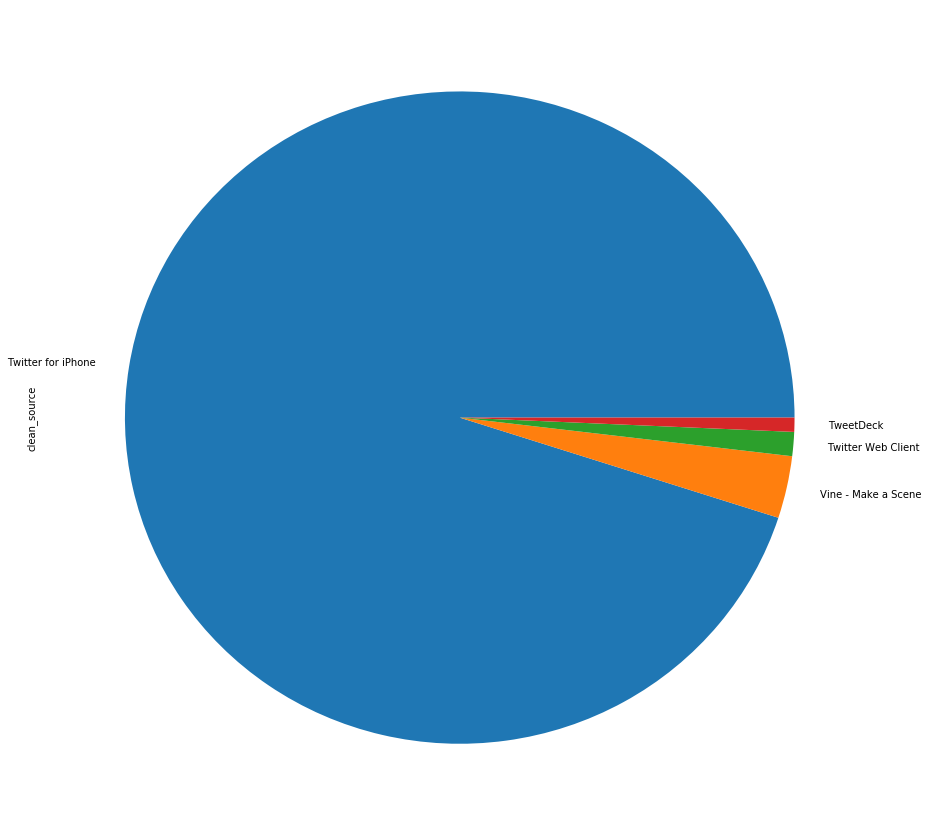

In [94]:
df_clean.clean_source.value_counts().plot(figsize= (15,15),kind='pie')

# That's all, Thank you